In [4]:
import pandas as pd
import streamlit as st
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
from scipy import stats
import seaborn as sns
import joblib
import pickle

import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
df=pd.read_csv("Employee-Attrition - Employee-Attrition.csv")

In [6]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [7]:
print(df.shape)

(1470, 35)


In [8]:
bins = [0, 2, 7, df['YearsAtCompany'].max()]
labels = ['New', 'Experienced', 'Veteran']
df['TenureCategory'] = pd.cut(df['YearsAtCompany'], bins=bins, labels=labels, include_lowest=True)

# Performance Metric
df['PerformanceMetric'] = df['PerformanceRating'] * df['PercentSalaryHike']

# Engagement Score
engagement_features = ['JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance', 'JobInvolvement']
df['EngagementScore'] = df[engagement_features].mean(axis=1)

print(df[['TenureCategory', 'PerformanceMetric', 'EngagementScore']].head())



  TenureCategory  PerformanceMetric  EngagementScore
0    Experienced                 33             2.50
1        Veteran                 92             2.50
2            New                 45             3.00
3        Veteran                 33             3.25
4            New                 36             2.25


In [9]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TenureCategory,PerformanceMetric,EngagementScore
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,Experienced,33,2.50
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,Veteran,92,2.50
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,New,45,3.00
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,Veteran,33,3.25
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,New,36,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,17,3,3,5,2,0,3,Experienced,51,3.50
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,9,5,3,7,7,1,7,Experienced,45,2.50
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,6,0,3,6,2,0,3,Experienced,80,2.75
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,17,3,2,9,6,0,8,Veteran,42,2.50


In [10]:
df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TenureCategory,PerformanceMetric,EngagementScore
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
df["Attrition"].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
nunique = df.nunique()

In [14]:
nunique

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [15]:
const_cols = nunique[nunique == 1].index

In [16]:
const_cols

Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')

In [17]:
df = df.drop(columns=const_cols)


In [18]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TenureCategory,PerformanceMetric,EngagementScore
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,8,0,1,6,4,0,5,Experienced,33,2.50
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,10,3,3,10,7,1,7,Veteran,92,2.50
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,7,3,3,0,0,0,0,New,45,3.00
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,8,3,3,8,7,3,0,Veteran,33,3.25
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,6,3,3,2,2,2,2,New,36,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,17,3,3,5,2,0,3,Experienced,51,3.50
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,9,5,3,7,7,1,7,Experienced,45,2.50
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,6,0,3,6,2,0,3,Experienced,80,2.75
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,17,3,2,9,6,0,8,Veteran,42,2.50


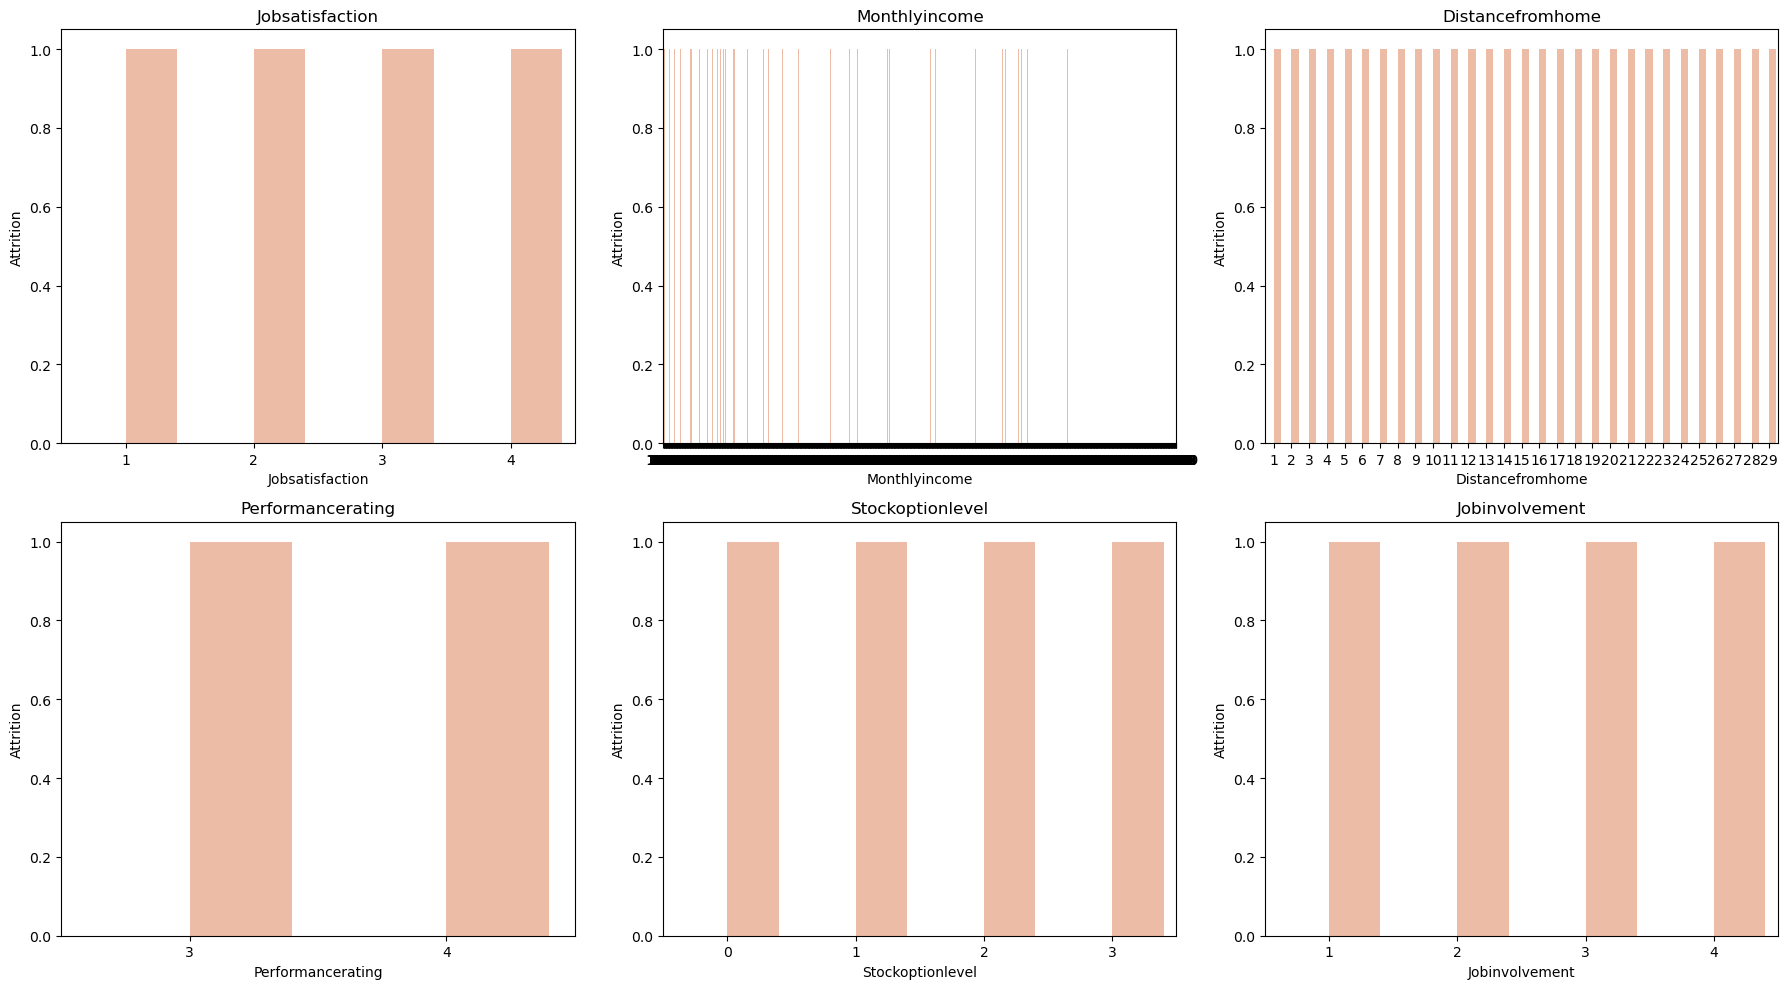

In [278]:
features = [
    'JobSatisfaction', 'MonthlyIncome', 'DistanceFromHome',
    'PerformanceRating', 'StockOptionLevel', 'JobInvolvement'
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for index, feature in enumerate(features):
    sns.barplot(
        x=feature,
        y='Attrition',
        data=df,
        ax=axes[index],
        errorbar=None,      
        hue='Attrition',    
        palette='coolwarm',
        legend=False         
    )
    axes[index].set_title(feature.replace('_', ' ').title())
    axes[index].set_ylabel('Attrition')
    axes[index].set_xlabel(feature.replace('_', ' ').title())

plt.tight_layout()
plt.show()

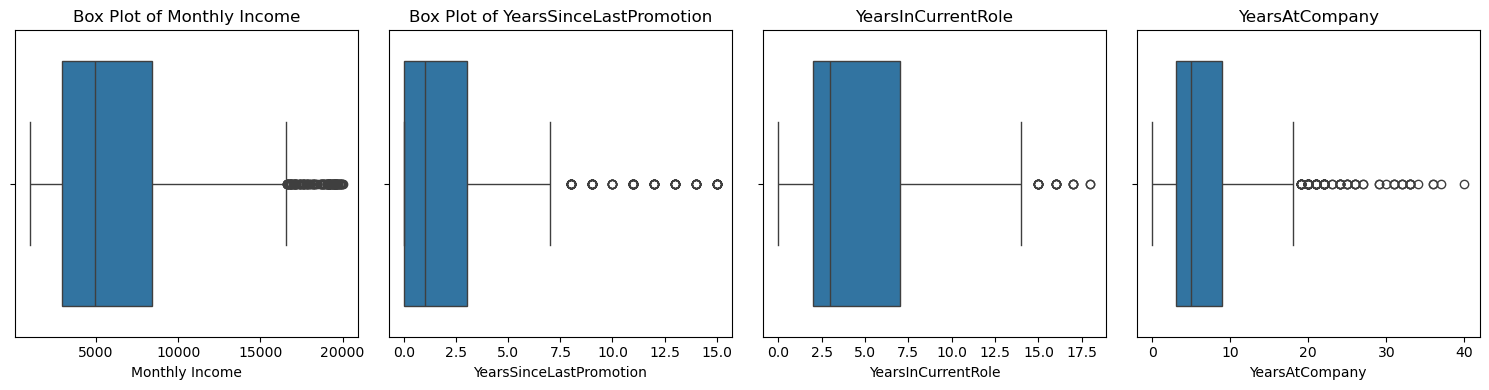

In [263]:
plt.figure(figsize=(15, 4))  

plt.subplot(1, 4, 1)         
sns.boxplot(x=df["MonthlyIncome"])
plt.title("Box Plot of Monthly Income")
plt.xlabel("Monthly Income")

plt.subplot(1, 4, 2)          
sns.boxplot(x=df["YearsSinceLastPromotion"])
plt.title("Box Plot of YearsSinceLastPromotion")
plt.xlabel("YearsSinceLastPromotion")

plt.subplot(1, 4, 3)          
sns.boxplot(x=df["YearsInCurrentRole"])
plt.title("YearsInCurrentRole")
plt.xlabel("YearsInCurrentRole")

plt.subplot(1, 4, 4)          
sns.boxplot(x=df["YearsAtCompany"])
plt.title("YearsAtCompany")
plt.xlabel("YearsAtCompany")


plt.tight_layout()            
plt.show()

In [21]:
df.select_dtypes(include="object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [18]:
!pip install category_encoders


In [22]:
# 1. Encode the target column separately
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

# 2. Encode categorical features using OrdinalEncoder
categorical_cols = ['BusinessTravel', 'OverTime','Department', 'EducationField', 'Gender', 'JobRole', 'TenureCategory', 'MaritalStatus']
encoder = OrdinalEncoder()
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])
df[categorical_cols] = df[categorical_cols].astype(int)


In [23]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TenureCategory,PerformanceMetric,EngagementScore
0,41,1,2,1102,2,1,2,1,1,2,...,8,0,1,6,4,0,5,0,33,2.50
1,49,0,1,279,1,8,1,1,2,3,...,10,3,3,10,7,1,7,2,92,2.50
2,37,1,2,1373,1,2,2,4,4,4,...,7,3,3,0,0,0,0,1,45,3.00
3,33,0,1,1392,1,3,4,1,5,4,...,8,3,3,8,7,3,0,2,33,3.25
4,27,0,2,591,1,2,1,3,7,1,...,6,3,3,2,2,2,2,1,36,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,17,3,3,5,2,0,3,0,51,3.50
1466,39,0,2,613,1,6,1,3,2062,4,...,9,5,3,7,7,1,7,0,45,2.50
1467,27,0,2,155,1,4,3,1,2064,2,...,6,0,3,6,2,0,3,0,80,2.75
1468,49,0,1,1023,2,2,3,3,2065,4,...,17,3,2,9,6,0,8,2,42,2.50


In [24]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TenureCategory,PerformanceMetric,EngagementScore
0,41,1,2,1102,2,1,2,1,1,2,...,8,0,1,6,4,0,5,0,33,2.50
1,49,0,1,279,1,8,1,1,2,3,...,10,3,3,10,7,1,7,2,92,2.50
2,37,1,2,1373,1,2,2,4,4,4,...,7,3,3,0,0,0,0,1,45,3.00
3,33,0,1,1392,1,3,4,1,5,4,...,8,3,3,8,7,3,0,2,33,3.25
4,27,0,2,591,1,2,1,3,7,1,...,6,3,3,2,2,2,2,1,36,2.25


In [25]:
df["Attrition"].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [26]:
1233/df.shape[0]

0.8387755102040816

In [27]:
df.shape

(1470, 35)

In [28]:
df.shape

(1470, 35)

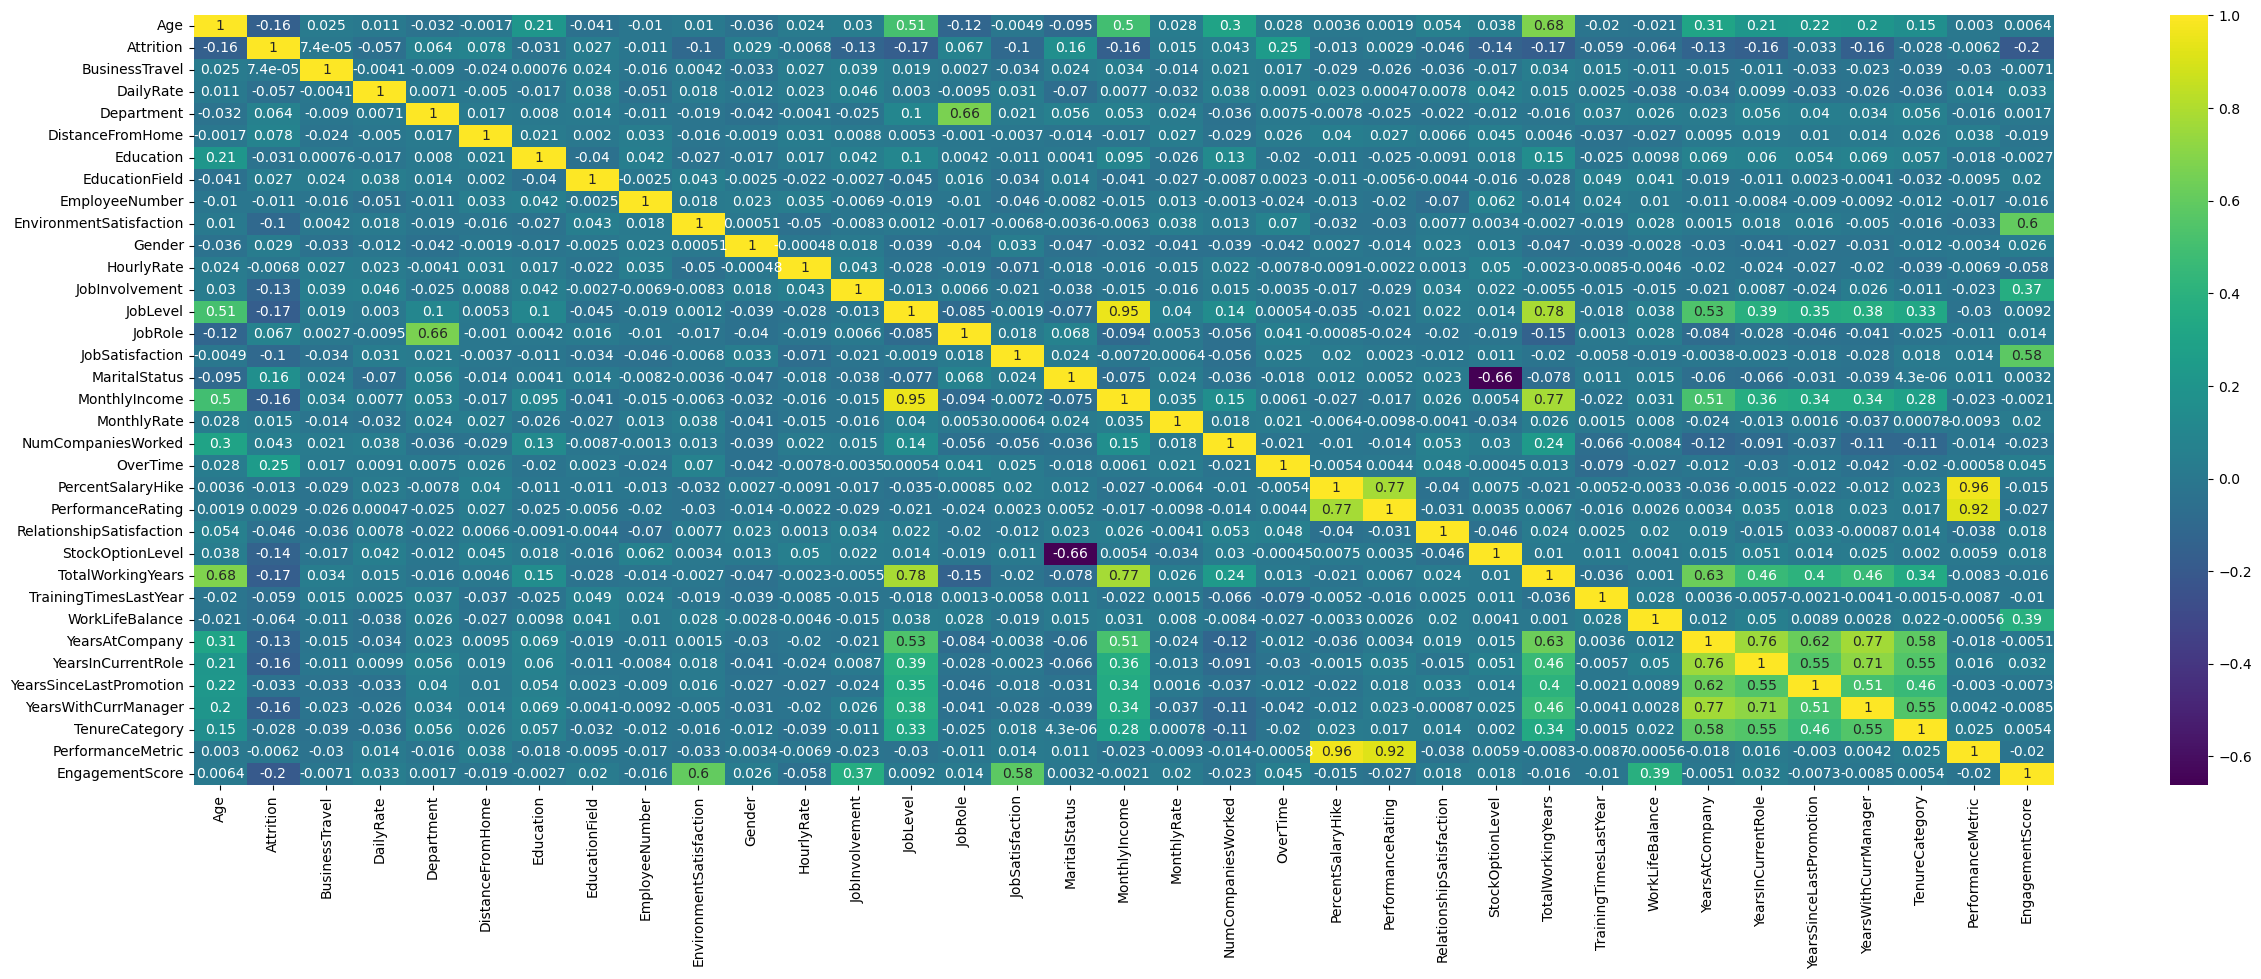

In [29]:
plt.figure(figsize= (30 ,  10))

sns.heatmap( df.corr(), cmap = "viridis", annot= True )

plt.show()

In [270]:
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']
feature_cols = list(X.columns)

In [31]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TenureCategory,PerformanceMetric,EngagementScore
0,41,2,1102,2,1,2,1,1,2,0,...,8,0,1,6,4,0,5,0,33,2.50
1,49,1,279,1,8,1,1,2,3,1,...,10,3,3,10,7,1,7,2,92,2.50
2,37,2,1373,1,2,2,4,4,4,1,...,7,3,3,0,0,0,0,1,45,3.00
3,33,1,1392,1,3,4,1,5,4,0,...,8,3,3,8,7,3,0,2,33,3.25
4,27,2,591,1,2,1,3,7,1,1,...,6,3,3,2,2,2,2,1,36,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,2061,3,1,...,17,3,3,5,2,0,3,0,51,3.50
1466,39,2,613,1,6,1,3,2062,4,1,...,9,5,3,7,7,1,7,0,45,2.50
1467,27,2,155,1,4,3,1,2064,2,1,...,6,0,3,6,2,0,3,0,80,2.75
1468,49,1,1023,2,2,3,3,2065,4,1,...,17,3,2,9,6,0,8,2,42,2.50


In [32]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [33]:
Attrition_count =y.value_counts()
Attrition_count

Attrition
0    1233
1     237
Name: count, dtype: int64

In [35]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3,random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1029, 34), (1029,), (441, 34), (441,))

In [36]:
X_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TenureCategory,PerformanceMetric,EngagementScore
1041,28,2,866,2,5,3,3,1469,4,1,...,6,4,3,5,4,1,3,0,54,2.75
184,53,2,1084,1,13,2,3,250,4,0,...,5,3,3,4,2,1,3,0,33,3.00
1222,24,2,240,0,22,1,0,1714,4,1,...,1,2,3,1,0,0,0,1,33,2.75
67,45,2,1339,1,7,3,1,86,2,1,...,25,2,3,1,0,0,0,1,51,2.25
220,36,2,1396,1,5,2,1,304,4,1,...,16,3,4,13,11,3,7,2,48,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,33,1,430,2,7,3,3,1477,4,1,...,5,2,3,4,3,0,3,0,42,2.75
331,27,0,210,2,1,1,2,449,3,1,...,6,0,3,5,4,1,4,0,39,2.75
323,28,2,1157,1,2,4,3,440,1,1,...,5,4,2,3,2,2,2,0,39,2.00
654,39,2,1383,0,2,3,1,909,4,0,...,13,2,3,5,4,0,4,0,33,3.25


In [44]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
X_train_scaled

array([[ 1.41369115,  0.59277912,  0.79421172, ..., -1.08160085,
         2.15676978,  1.19949746],
       [-0.09834647,  0.59277912, -1.44072151, ..., -1.08160085,
         1.71148164, -0.47979898],
       [-1.71838678,  0.59277912, -1.14354907, ...,  0.06578809,
        -0.57062009, -0.47979898],
       ...,
       [-1.61038409, -0.92079337,  1.11348789, ...,  0.06578809,
        -0.9045862 ,  0.63973198],
       [-0.85436528,  0.59277912,  1.41311631, ..., -1.08160085,
        -0.57062009,  0.0799665 ],
       [ 1.41369115,  0.59277912, -1.32283492, ...,  0.06578809,
        -0.06967093,  0.63973198]])

In [46]:
X_test_scaled

array([[-0.96236797,  0.59277912,  0.15565937, ..., -1.08160085,
         0.26429517,  0.0799665 ],
       [ 1.73769921,  0.59277912,  0.69106095, ..., -1.08160085,
        -0.9045862 ,  0.63973198],
       [-1.39437872,  0.59277912, -1.38177822, ...,  0.06578809,
        -0.9045862 ,  0.0799665 ],
       ...,
       [-0.96236797,  0.59277912,  0.87034681, ..., -1.08160085,
        -0.57062009, -1.59932994],
       [ 0.22566159,  0.59277912,  1.42539616, ..., -1.08160085,
        -0.9045862 ,  1.19949746],
       [-0.20634916,  0.59277912, -1.71579022, ...,  0.06578809,
        -0.73760315, -1.59932994]])

In [47]:
# Class distribution
y_train.value_counts()

Attrition
0    853
1    176
Name: count, dtype: int64

In [48]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train.value_counts())


Before SMOTE: Attrition
0    853
1    176
Name: count, dtype: int64
After SMOTE: Attrition
0    853
1    176
Name: count, dtype: int64


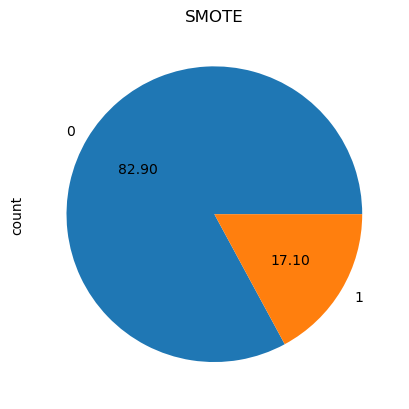

In [49]:
ax = y_train.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("SMOTE")
plt.show()

In [52]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000)

In [54]:
y_predict= model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [55]:
model.predict_proba(X_test)

array([[9.21629468e-01, 7.83705323e-02],
       [9.92458559e-01, 7.54144112e-03],
       [8.14616819e-01, 1.85383181e-01],
       [9.91599925e-01, 8.40007522e-03],
       [9.61018855e-01, 3.89811451e-02],
       [7.68273654e-01, 2.31726346e-01],
       [8.15917215e-01, 1.84082785e-01],
       [9.66210403e-01, 3.37895972e-02],
       [8.82422770e-01, 1.17577230e-01],
       [9.80415727e-01, 1.95842725e-02],
       [6.42051427e-01, 3.57948573e-01],
       [9.61001114e-01, 3.89988858e-02],
       [7.48351174e-01, 2.51648826e-01],
       [9.79155190e-01, 2.08448096e-02],
       [9.63955591e-01, 3.60444094e-02],
       [9.19969226e-01, 8.00307741e-02],
       [8.38015641e-01, 1.61984359e-01],
       [9.43833870e-01, 5.61661302e-02],
       [6.37197026e-01, 3.62802974e-01],
       [9.41244354e-01, 5.87556457e-02],
       [8.10502623e-01, 1.89497377e-01],
       [9.93955069e-01, 6.04493126e-03],
       [9.63990156e-01, 3.60098443e-02],
       [5.16771098e-01, 4.83228902e-01],
       [7.838804

In [56]:
df_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

In [57]:
df_predicted

,Actual,Predicted
1041,0,0
184,0,0
1222,1,0
67,0,0
220,0,0
...,...,...
1047,0,0
331,0,0
323,1,1
654,0,0


In [58]:
print(accuracy_score(y_test,y_predict))

0.8707482993197279


In [59]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Attrition,,
0,368,12
1,45,16


In [60]:
y_predict_th3 = np.where(model.predict_proba(X_test)[:,1]>0.3,1,0) # Threshold is 0.3

In [61]:
pd.crosstab(y_test,y_predict_th3)

col_0,0,1
Attrition,,
0,349,31
1,34,27


In [62]:
y_predict_th4 = np.where(model.predict_proba(X_test)[:,1]>0.4,1,0) # Threshold is 0.4

In [63]:
pd.crosstab(y_test,y_predict_th4)

col_0,0,1
Attrition,,
0,358,22
1,39,22


In [64]:
y_predict_th6 = np.where(model.predict_proba(X_test)[:,1]>0.6,1,0) # Threshold is 0.6

In [65]:
pd.crosstab(y_test,y_predict_th6)

col_0,0,1
Attrition,,
0,377,3
1,51,10


In [188]:
def predict_threshold (model,X_test,thresholds):
   return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0)

In [190]:
from sklearn.metrics import confusion_matrix

for thr in np.arange(0,1.0,0.1):
   y_predict = predict_threshold(model,X_test,thr)
   print("Threshold :",thr)
   print(confusion_matrix(y_test,y_predict))
   print(accuracy_score(y_test,y_predict))
   print("**********************************")

Threshold : 0.0
[[  0 380]
 [  0  61]]
0.1383219954648526
**********************************
Threshold : 0.1
[[239 141]
 [ 17  44]]
0.6417233560090703
**********************************
Threshold : 0.2
[[312  68]
 [ 27  34]]
0.7845804988662132
**********************************
Threshold : 0.30000000000000004
[[349  31]
 [ 34  27]]
0.8526077097505669
**********************************
Threshold : 0.4
[[358  22]
 [ 39  22]]
0.8616780045351474
**********************************
Threshold : 0.5
[[368  12]
 [ 45  16]]
0.8707482993197279
**********************************
Threshold : 0.6000000000000001
[[377   3]
 [ 51  10]]
0.8775510204081632
**********************************
Threshold : 0.7000000000000001
[[378   2]
 [ 55   6]]
0.8707482993197279
**********************************
Threshold : 0.8
[[380   0]
 [ 60   1]]
0.8639455782312925
**********************************
Threshold : 0.9
[[380   0]
 [ 61   0]]
0.8616780045351474
**********************************


In [66]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       380
           1       0.57      0.26      0.36        61

    accuracy                           0.87       441
   macro avg       0.73      0.62      0.64       441
weighted avg       0.85      0.87      0.85       441



In [67]:
# Lasso Regression model
lasso = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [68]:
# Predict on test data
y_pred = lasso.predict(X_test_scaled)	

In [69]:
y_pred

array([0.16918347, 0.16918347, 0.16918347, 0.16918347, 0.16918347,
       0.17559356, 0.16918347, 0.16918347, 0.16918347, 0.16918347,
       0.17559356, 0.16918347, 0.16918347, 0.17559356, 0.16918347,
       0.16918347, 0.17559356, 0.16918347, 0.17559356, 0.16918347,
       0.16918347, 0.16918347, 0.16918347, 0.17559356, 0.16918347,
       0.16918347, 0.16918347, 0.16918347, 0.16918347, 0.16918347,
       0.16918347, 0.16918347, 0.16918347, 0.16918347, 0.17559356,
       0.16918347, 0.16918347, 0.16918347, 0.17559356, 0.16918347,
       0.16918347, 0.16918347, 0.16918347, 0.16918347, 0.17559356,
       0.16918347, 0.17559356, 0.16918347, 0.17559356, 0.17559356,
       0.16918347, 0.17559356, 0.16918347, 0.16918347, 0.16918347,
       0.17559356, 0.17559356, 0.16918347, 0.16918347, 0.16918347,
       0.16918347, 0.16918347, 0.16918347, 0.16918347, 0.16918347,
       0.17559356, 0.16918347, 0.17559356, 0.16918347, 0.17559356,
       0.16918347, 0.16918347, 0.17559356, 0.16918347, 0.17559

In [70]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Lasso Regression Results")
print("------------------------")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")
print("Coefficients:", lasso.coef_)

Lasso Regression Results
------------------------
Mean Squared Error: 0.1199
R^2 Score: -0.0061
Coefficients: [-0.          0.         -0.          0.          0.         -0.
  0.          0.         -0.          0.         -0.         -0.
 -0.          0.         -0.          0.         -0.          0.
  0.          0.00290747 -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.        ]


In [72]:
from sklearn.tree import DecisionTreeClassifier
AttritionTree = DecisionTreeClassifier(criterion="gini", max_depth = 4)
AttritionTree.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=4)

In [73]:
predTree = AttritionTree.predict(X_test)

In [74]:
from sklearn import metrics
print(f"DecisionTrees's Accuracy: {metrics.accuracy_score(y_test, predTree)}")

DecisionTrees's Accuracy: 0.8344671201814059


In [151]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(n_estimators=100,random_state=42)

rfc.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [153]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoder.fit(X_train[categorical_cols])
X_traincat = encoder.fit_transform(X_train[categorical_cols])


X_trainencoded = X_train.copy()
for i, col in enumerate(categorical_cols):
    X_trainencoded[col] = X_traincat[:, i]
feature_order = X_trainencoded.columns.tolist()

joblib.dump(le, "labelencoder.pkl")
joblib.dump(categorical_cols, "categoricalcols.pkl")
joblib.dump(feature_order, "feature_order.pkl")
joblib.dump(encoder, "encoder.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(rfc, "model.pkl")

print("Saved encoder, scaler, model and categorical columns list")


Saved encoder, scaler, model and categorical columns list


In [152]:
# Predict the Test set results

y_pred = rfc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [154]:
# Check accuracy score
from sklearn.metrics import accuracy_score

print('Model accuracy score with 200 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 200 decision-trees : 0.8571


In [216]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [200, 300, 400],    # Use values >= your current 200
    'max_depth': [15, 20, 25,None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize GridSearchCV with your existing settings
gscv = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight=None),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',   # Use 'f1' if your data is imbalanced
    n_jobs=-1,
    verbose=2
)

# Fit grid search to the training data
gscv.fit(X_train_resampled, y_train_resampled)

# Use the best found estimator
rfc = gscv.best_estimator_


Fitting 3 folds for each of 216 candidates, totalling 648 fits


In [217]:
# Evaluate best model on test set

y_pred = best_rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.4f}")

Test set accuracy: 0.8571


In [213]:


from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay
)

In [218]:
# 1. Accuracy
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8707


In [219]:
# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[368  12]
 [ 45  16]]


In [220]:
model.predict_proba(X_test)[:1]

array([[0.92162947, 0.07837053]])

In [221]:
# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

In [222]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.00263158 0.00263158 0.00526316 0.00526316
 0.00789474 0.00789474 0.01052632 0.01052632 0.02894737 0.02894737
 0.03157895 0.03157895 0.03684211 0.03684211 0.04473684 0.04473684
 0.04736842 0.04736842 0.05       0.05       0.05526316 0.05526316
 0.06052632 0.06052632 0.06842105 0.06842105 0.07894737 0.07894737
 0.08684211 0.08684211 0.11052632 0.11052632 0.12631579 0.12631579
 0.16842105 0.16842105 0.17368421 0.17368421 0.17894737 0.17894737
 0.18421053 0.18421053 0.2        0.2        0.21315789 0.21315789
 0.24736842 0.24736842 0.26842105 0.26842105 0.28684211 0.28684211
 0.30263158 0.30263158 0.32631579 0.32631579 0.32894737 0.32894737
 0.37105263 0.37105263 0.37368421 0.37368421 0.39210526 0.39210526
 0.40789474 0.40789474 0.41578947 0.41578947 0.42368421 0.42368421
 0.43421053 0.43421053 0.47105263 0.47105263 0.51842105 0.51842105
 0.56315789 0.56315789 0.66842105 0.66842105 0.68157895 0.68157895
 0.70526316 0.70526316 0.83684211 0.83684211 0.84210526 0.8421

In [223]:
# 4. AUROC
roc_auc = auc(fpr, tpr)
print(f"AUROC: {roc_auc:.4f}")

AUROC: 0.7671


<Figure size 640x480 with 0 Axes>

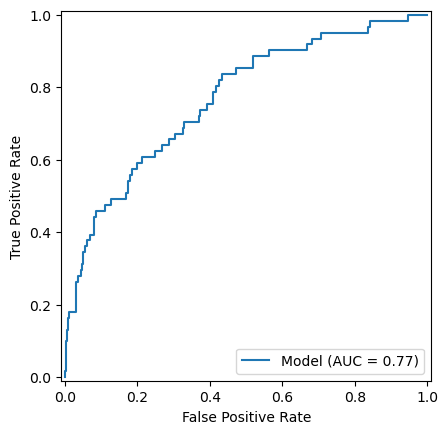

In [224]:
# Optional: Plot ROC curve
plt.figure()
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Model').plot()
plt.show()

In [225]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def evaluate(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("TRAINING RESULTS: \n===============================")
    train_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{train_report}")

    print("TESTING RESULTS: \n===============================")
    test_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{test_report}")


In [226]:
evaluate(rfc, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[853   0]
 [  0 176]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[355  25]
 [ 46  15]]
ACCURACY SCORE:
0.8390
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.885287   0.375000  0.839002    0.630143      0.814703
recall       0.934211   0.245902  0.839002    0.590056      0.839002
f1-score     0.909091   0.297030  0.839002    0.603060      0.824429
support    380.000000  61.000000  0.839002  441.000000    441.000000


In [227]:
from sklearn.preprocessing import StandardScaler
preprocessor = StandardScaler()
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

# Fit pipeline
pipeline.fit(X, y)

# Save pipeline to file
joblib.dump(pipeline, "pipeline.pkl") 

['pipeline.pkl']

In [231]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)
y_proba = model.predict_proba(X_test_scaled_df)[:, 1]


# Default threshold
y_pred_default = (y_proba > 0.5).astype(int)

# Lower threshold
y_pred_custom = (y_proba > 0.35).astype(int)

print("Default predictions (0.5):", np.unique(y_pred_default, return_counts=True))
print("Custom predictions (0.35):", np.unique(y_pred_custom, return_counts=True))

Default predictions (0.5): (array([0, 1]), array([249, 192]))
Custom predictions (0.35): (array([0, 1]), array([190, 251]))


In [233]:
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [234]:
gbc = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbc.fit(X_train_resampled, y_train_resampled)

# 5. Predictions
y_pred = gbc.predict(X_test_scaled)
y_proba = gbc.predict_proba(X_test_scaled)[:,1]

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [235]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[138 242]
 [ 14  47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.36      0.52       380
           1       0.16      0.77      0.27        61

    accuracy                           0.42       441
   macro avg       0.54      0.57      0.39       441
weighted avg       0.80      0.42      0.48       441


Accuracy: 0.41950113378684806


In [236]:
# Encode categoricals
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_cat = encoder.fit_transform(df[categorical_cols])        

In [237]:
scaler = StandardScaler()
X_num = scaler.fit_transform(df[numeric_cols])

In [238]:
import numpy as np
X_scaled = np.hstack([X_num, X_cat])

In [239]:
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_scaled, y)

# Save model, encoder, and scaler
joblib.dump(gbc, "gbc_model.pkl")
joblib.dump(encoder, "encoder_gb.pkl")
joblib.dump(scaler, "scaler_gb.pkl")
print("Gradient Boosting model saved successfully!")

Gradient Boosting model saved successfully!


In [240]:
import joblib
joblib.dump(gbc, "gradient_boosting_model.pkl")
joblib.dump(scaler, "scaler_gb.pkl")

['scaler_gb.pkl']

In [268]:
# 1. Accuracy
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8707
